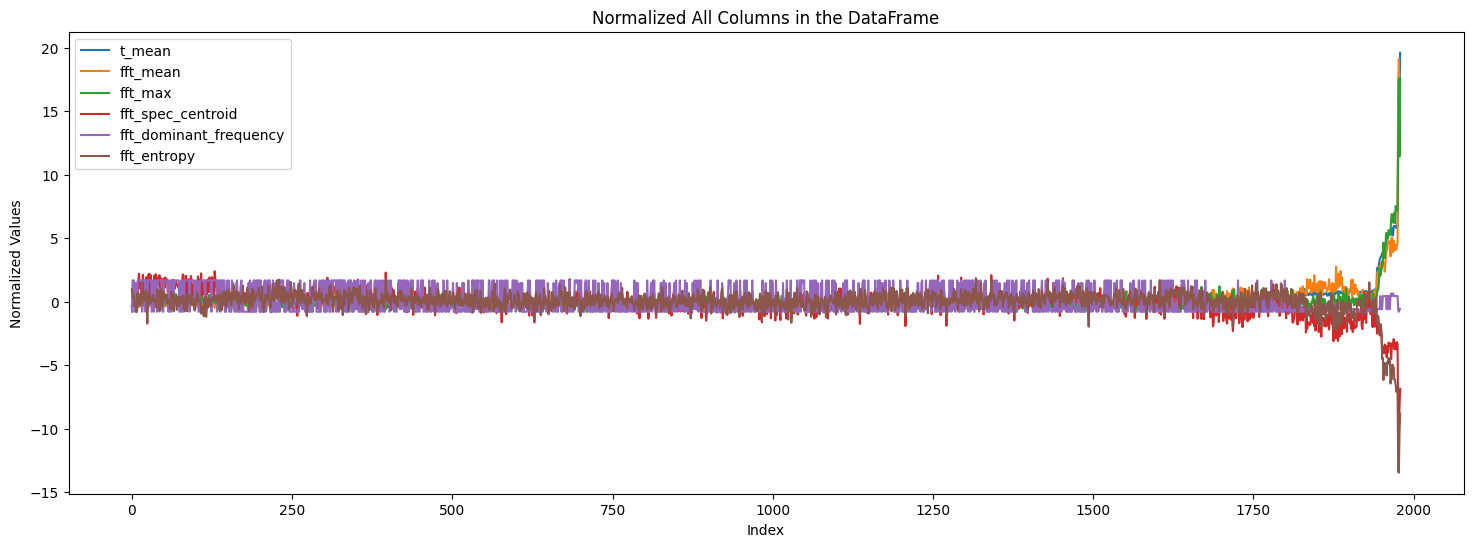

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

b = 4
data_path = "../data/IMS/1st_test/"
data = f"features_scaled_{b}.csv"


df = pd.read_csv(os.path.join(data_path, data))
df = df.reset_index(drop=True)



df.plot(figsize=(18,6))

plt.xlabel('Index')
plt.ylabel('Normalized Values')
plt.title('Normalized All Columns in the DataFrame')

plt.show()


In [13]:

df.head()


,t_mean,fft_mean,fft_max,fft_spec_centroid,fft_dominant_frequency,fft_entropy
0,-0.260540,-0.419362,-0.398778,0.914232,-0.793467,0.986974
1,-0.293014,-0.332558,-0.433913,1.023726,1.680001,0.335864
2,-0.258588,-0.344488,-0.105982,0.913092,1.680001,0.449129
3,-0.317964,-0.340221,-0.203936,0.899979,1.680001,0.466281
4,-0.197140,-0.319342,0.009885,-0.072243,-0.793467,-0.359272


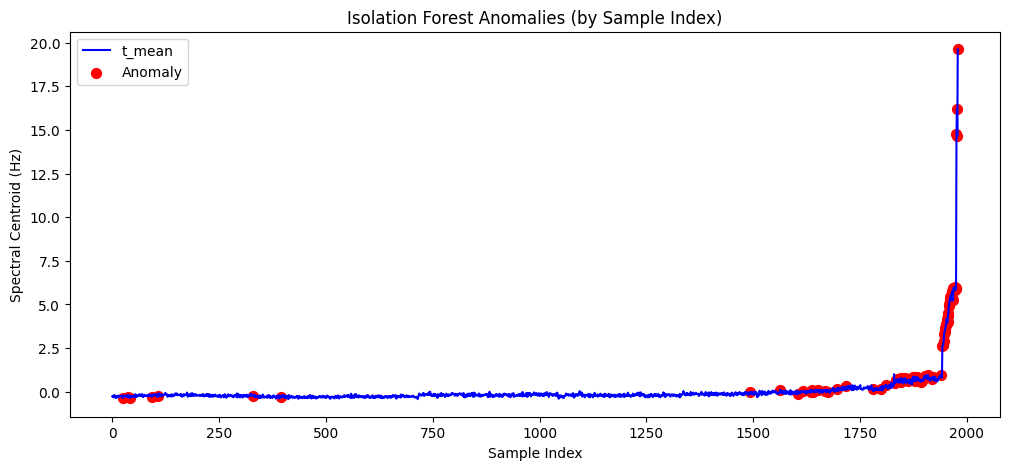

In [ ]:
from sklearn.ensemble import IsolationForest

feature = "t_mean"

iso = IsolationForest(contamination=0.05, random_state=42)
y_pred = iso.fit_predict(df)
anomalies = np.where(y_pred == -1)[0]

df['anomaly'] = (y_pred == -1).astype(int)

plt.figure(figsize=(12,5))
plt.plot(df.index, df[feature], label=feature, color='blue')
plt.scatter(df.index[df['anomaly'] == 1],
            df.loc[df['anomaly'] == 1, feature],
            color='red', label='Anomaly', s=50)
plt.xlabel('Sample Index')
plt.ylabel('Spectral Centroid (Hz)')
plt.title('Isolation Forest Anomalies (by Sample Index)')
plt.legend()
plt.show()




In [15]:
from sklearn.model_selection import TimeSeriesSplit


tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(df):
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]


predicted=0.056, expected=0.065
predicted=0.034, expected=0.072
predicted=0.037, expected=0.048
predicted=0.064, expected=0.072
predicted=0.037, expected=0.023
predicted=0.035, expected=-0.075
predicted=0.041, expected=0.106
predicted=0.018, expected=0.001
predicted=0.035, expected=-0.033
predicted=0.051, expected=0.084
predicted=0.016, expected=-0.028
predicted=0.010, expected=0.031
predicted=0.055, expected=0.061
predicted=0.019, expected=-0.036
predicted=0.010, expected=-0.050
predicted=0.035, expected=0.091
predicted=0.003, expected=0.079
predicted=0.021, expected=0.109
predicted=0.082, expected=0.096
predicted=0.041, expected=0.062
predicted=0.041, expected=-0.024
predicted=0.064, expected=0.109
predicted=0.041, expected=0.100
predicted=0.034, expected=0.016
predicted=0.086, expected=0.071
predicted=0.040, expected=0.011
predicted=0.025, expected=0.117
predicted=0.082, expected=0.107
predicted=0.058, expected=-0.035
predicted=0.025, expected=-0.068
predicted=0.051, expected=-0.019

/tmp/ipykernel_13472/2552995728.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat = coef[0]
/tmp/ipykernel_13472/2552995728.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat += coef[d+1] * lag[window-d-1]


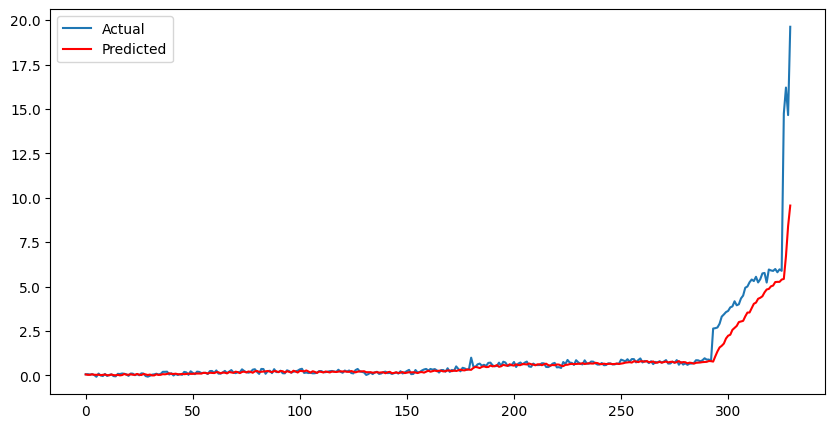

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Code based on: https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

train = X_train["t_mean"]
test = X_test["t_mean"]

window = 29
model = AutoReg(train, lags=window)
model_fit = model.fit()
coef = model_fit.params

history = train.values[-window:].tolist() 
predictions = []

for t in range(len(test)):
    lag = history[-window:]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test.iloc[t]  
    predictions.append(yhat)
    history.append(obs)
    print(f'predicted={yhat:.3f}, expected={obs:.3f}')

rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse:.3f}')

plt.figure(figsize=(10,5))
plt.plot(test.values, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()


Test RMSE: 0.596


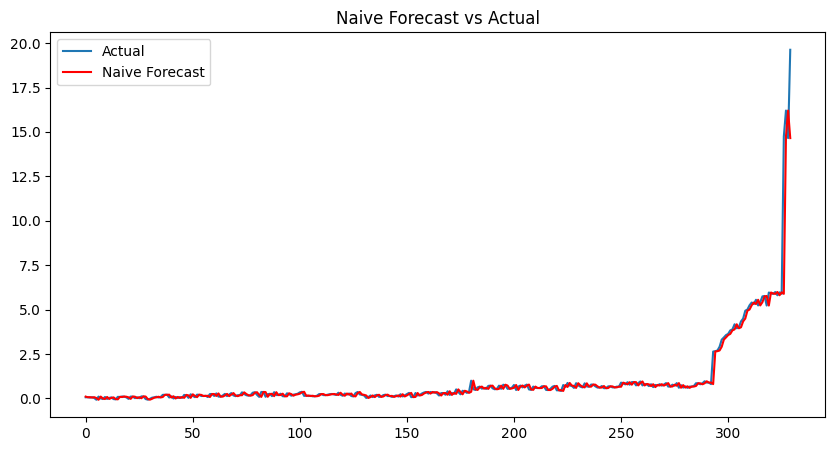

In [ ]:
predictions = []

for i in range(len(test)):
    if i == 0:
        yhat = train.iloc[-1]
    else:
        yhat = test.iloc[i - 1]
    predictions.append(yhat)


rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"Test RMSE: {rmse:.3f}")

plt.figure(figsize=(10, 5))
plt.plot(test.values, label="Actual")
plt.plot(predictions, color="red", label="Naive Forecast")
plt.legend()
plt.title("Naive Forecast vs Actual")
plt.show()

Autoregressive   for bearing 3: RSME 1.066

Naive forecaster for bearing 3: RSME 0.596

RSME is not a good metric for anomaly detection, something better is required. 